In [3]:
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

'''加载数据集&数据预处理'''
def loadDataSet():
    # 加载CIFAR-10数据集
    def unpickle(file):
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
        return dict

    def load_cifar10_batch(file):
        batch = unpickle(file)
        images = batch[b'data']
        labels = batch[b'labels']
        images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("float32")
        labels = np.array(labels)
        return images, labels

    # 加载训练集和测试集
    train_images = []
    train_labels = []
    for i in range(1, 6):
        file = f'C:/Users/ClairDeLune/Desktop/机器学习大作业/data-CIFAR-10/cifar-10-batches-py/data_batch_{i}'
        images, labels = load_cifar10_batch(file)
        train_images.append(images)
        train_labels.append(labels)

    train_images = np.concatenate(train_images)
    train_labels = np.concatenate(train_labels)

    test_images, test_labels = load_cifar10_batch('C:/Users/ClairDeLune/Desktop/机器学习大作业/data-CIFAR-10/cifar-10-batches-py/test_batch')

    # 展平图像
    train_images = train_images.reshape(-1, 3 * 32 * 32)
    test_images = test_images.reshape(-1, 3 * 32 * 32)

    # 标准化特征
    scaler = StandardScaler()
    train_images = scaler.fit_transform(train_images)
    test_images = scaler.transform(test_images)

    return train_images, test_images, train_labels, test_labels

In [4]:
'''定义训练函数、预测函数及ROC曲线绘制函数'''

def test(model, x_test, y_test):
    y_pred = model.predict(x_test)
    con_matrix = confusion_matrix(y_test, y_pred)
    print('confusion_matrix:\n', con_matrix)
    print('accuracy:{}'.format(accuracy_score(y_test, y_pred)))
    print('precision:{}'.format(precision_score(y_test, y_pred, average='micro')))
    print('recall:{}'.format(recall_score(y_test, y_pred, average='micro')))
    print('f1-score:{}'.format(f1_score(y_test, y_pred, average='micro')))

def plot_roc_curve(model, x_test, y_test, n_classes):
    # 计算测试集上的概率预测
    y_prob = model.predict_proba(x_test)
    
    # 计算每个类别的ROC曲线和AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # 绘制所有类别的ROC曲线
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i + 1} (area = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [5]:
X_train, X_test, y_train, y_test = loadDataSet()

In [ ]:
'''逻辑回归'''

In [ ]:
def train(X_train, y_train):
    # 创建逻辑回归分类器，使用OneVsRest策略
    clf = OneVsRestClassifier(LogisticRegression(max_iter=2000))
    # 训练模型
    clf.fit(X_train, y_train)
    return clf

In [19]:
model = train(X_train, y_train)

d:\Software\Anaconda3\envs\d2l\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Software\Anaconda3\envs\d2l\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [23]:
test(model, X_test, y_test)

confusion_matrix:
 [[448  52  48  40  28  38  22  55 190  79]
 [ 72 431  36  48  28  45  48  50  79 163]
 [ 97  43 253  95 119  93 131  81  54  34]
 [ 51  60 107 220  68 194 144  55  43  58]
 [ 55  35 130  68 285 102 157 111  31  26]
 [ 49  50 106 172  80 309  88  75  39  32]
 [ 22  52  94 128 103  83 419  46  22  31]
 [ 47  51  87  62  88  95  44 409  51  66]
 [135  92  28  37  15  41  13  25 512 102]
 [ 72 175  29  36  34  33  40  68  95 418]]
accuracy:0.3704
precision:0.3704
recall:0.3704
f1-score:0.3704


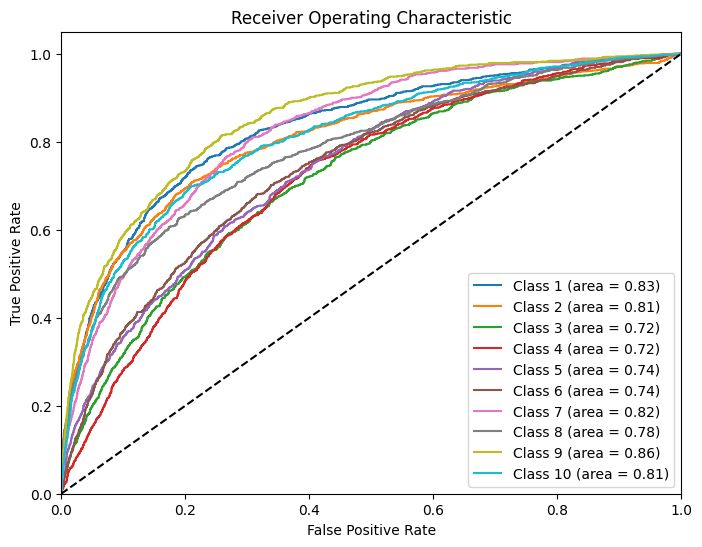

In [24]:
# 获取类别数量
n_classes = len(np.unique(y_train))
# 绘制ROC曲线
plot_roc_curve(model, X_test, y_test, n_classes)

In [ ]:
'''SVM'''

In [5]:
from sklearn import svm
def train_svm(x_train, y_train):
    # 创建 SVM 分类器
    clf = svm.SVC(kernel='rbf', probability=True, max_iter=1000)
    
    # 训练模型
    clf.fit(x_train, y_train)
    
    return clf

In [6]:
model = train_svm(X_train, y_train)

d:\Software\Anaconda3\envs\d2l\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [7]:
test(model, X_test, y_test)

confusion_matrix:
 [[454  31  51  17  33  21  37  35 240  81]
 [ 36 464  10  25  13  13  37  29  88 285]
 [ 78  20 190  58 141  88 240 125  41  19]
 [ 19  33  69 236  54 200 216  85  32  56]
 [ 31  11  51  34 276  72 264 193  45  23]
 [ 20  13  87 228  76 300 113 104  32  27]
 [  8  11  49  53  46  63 662  66  18  24]
 [ 45  16  47  71  58  76  36 572  18  61]
 [ 54  44   9  23  17  17  25  15 694 102]
 [ 39 125  14  33  15  14  30  32  63 635]]
accuracy:0.4483
precision:0.4483
recall:0.4483
f1-score:0.4483


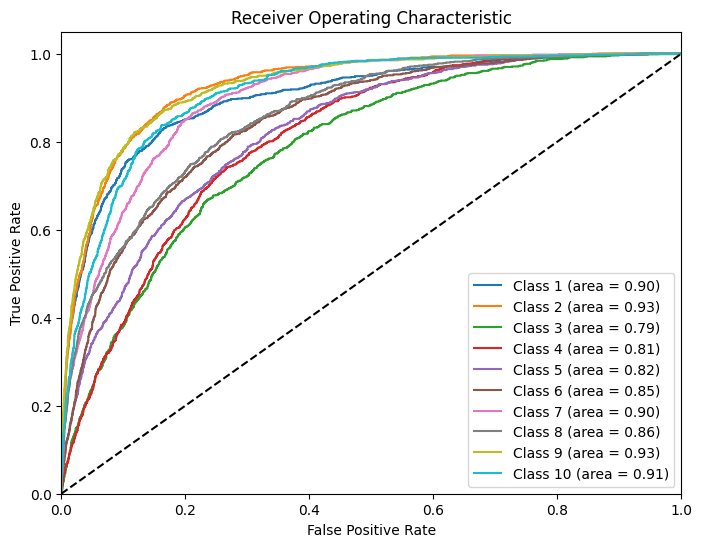

In [11]:
# 获取类别数量
n_classes = len(np.unique(y_train))
# 绘制ROC曲线
plot_roc_curve(model, X_test, y_test, n_classes)

In [ ]:
'''决策树'''

In [6]:
from sklearn import tree
def train_DecisionTree(x_train, y_train):
    # 创建 决策树 分类器
    clf = tree.DecisionTreeClassifier(criterion='entropy')
    
    # 训练模型
    clf.fit(x_train, y_train)
    
    return clf

In [7]:
model = train_DecisionTree(X_train, y_train)

In [8]:
test(model, X_test, y_test)

confusion_matrix:
 [[369  56 120  59  66  48  22  46 152  62]
 [ 88 259  66  72  52  55  60  70 117 161]
 [ 98  55 213 109 152  99  99  79  39  57]
 [ 56  61 101 170  97 160 124 115  57  59]
 [ 51  43 146 118 211  90 140 114  38  49]
 [ 54  50 108 164  80 230  86 121  55  52]
 [ 34  49 140 123 117 105 282  72  31  47]
 [ 67  61 104  97 116  92  68 256  53  86]
 [134 102  62  53  49  59  27  47 374  93]
 [ 83 159  52  75  41  49  48  85 112 296]]
accuracy:0.266
precision:0.266
recall:0.266
f1-score:0.266


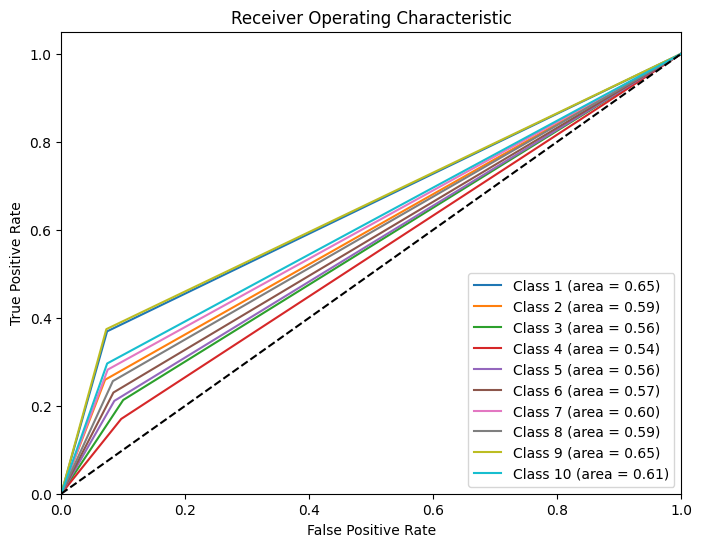

In [9]:
# 获取类别数量
n_classes = len(np.unique(y_train))
# 绘制ROC曲线
plot_roc_curve(model, X_test, y_test, n_classes)

In [ ]:
'''随机森林'''

In [10]:
from sklearn.ensemble import RandomForestClassifier
def train_RandomForestClassifier(x_train, y_train):
    # 创建 随机森林 分类器
    clf = RandomForestClassifier(n_estimators=100)
    
    # 训练模型
    clf.fit(x_train, y_train)
    
    return clf

In [11]:
model = train_RandomForestClassifier(X_train, y_train)

In [12]:
test(model, X_test, y_test)

confusion_matrix:
 [[558  32  57  17  32  27  19  27 169  62]
 [ 38 563  19  36  23  31  31  28  62 169]
 [ 97  46 335  82 153  65 105  61  27  29]
 [ 63  43  69 285  83 164 143  57  25  68]
 [ 53  22 149  63 388  45 149  80  26  25]
 [ 35  28  92 153  86 383  80  84  27  32]
 [ 15  32  82  63 113  66 557  21  13  38]
 [ 48  43  47  72 103  78  45 450  21  93]
 [ 86  77  15  32  21  32  12  24 624  77]
 [ 48 162  15  34  12  22  30  49  79 549]]
accuracy:0.4692
precision:0.4692
recall:0.4692
f1-score:0.4692


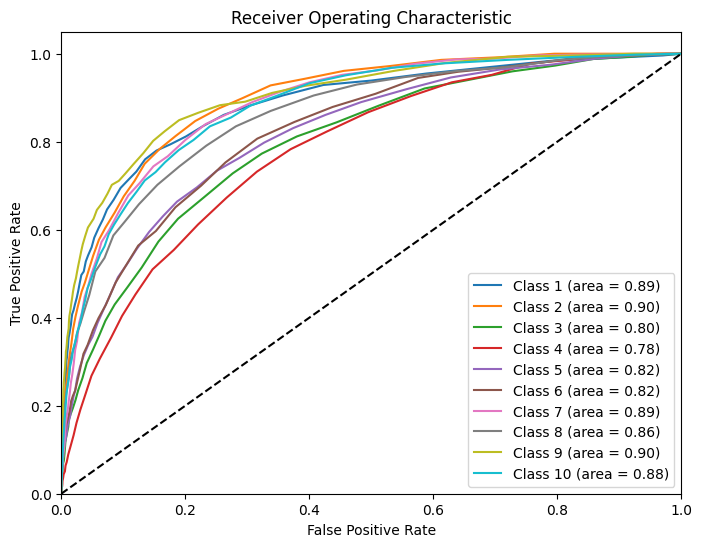

In [13]:
# 获取类别数量
n_classes = len(np.unique(y_train))
# 绘制ROC曲线
plot_roc_curve(model, X_test, y_test, n_classes)

In [14]:
'''引入PCA降维, 调整相应参数改进随机森林算法'''

'引入PCA降维, 调整相应参数改进随机森林算法'

In [69]:
from sklearn.decomposition import PCA
#PCA降维
def pca(x_train, x_test, n_components=85):
    pca = PCA(n_components=n_components, svd_solver='randomized')
    pca.fit(x_train)
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    return x_train, x_test

In [70]:
from sklearn.ensemble import RandomForestClassifier
def train_RandomForestClassifier(x_train, y_train):
    # 创建 随机森林 分类器
    clf = RandomForestClassifier(n_estimators=500, criterion='entropy')
    
    # 训练模型
    clf.fit(x_train, y_train)
    
    return clf

In [71]:
X_train_pca, X_test_pca = pca(X_train, X_test)
model = train_RandomForestClassifier(X_train_pca, y_train)

In [72]:
test(model, X_test_pca, y_test)

confusion_matrix:
 [[582  39  30  23  26  15  30  25 172  58]
 [ 34 604  13  30  11  21  24  30  83 150]
 [107  37 323  71 124  65 141  54  52  26]
 [ 52  53  65 259  45 209 138  61  38  80]
 [ 56  17  96  62 410  49 159  88  32  31]
 [ 20  29  70 148  55 416 100  80  47  35]
 [ 12  27  71  39  91  55 637  19  20  29]
 [ 40  31  44  59  81  74  55 485  41  90]
 [ 88  79  10  16  10  32  16  14 664  71]
 [ 46 182   5  29  11  19  36  27 107 538]]
accuracy:0.4918
precision:0.4918
recall:0.4918
f1-score:0.4918


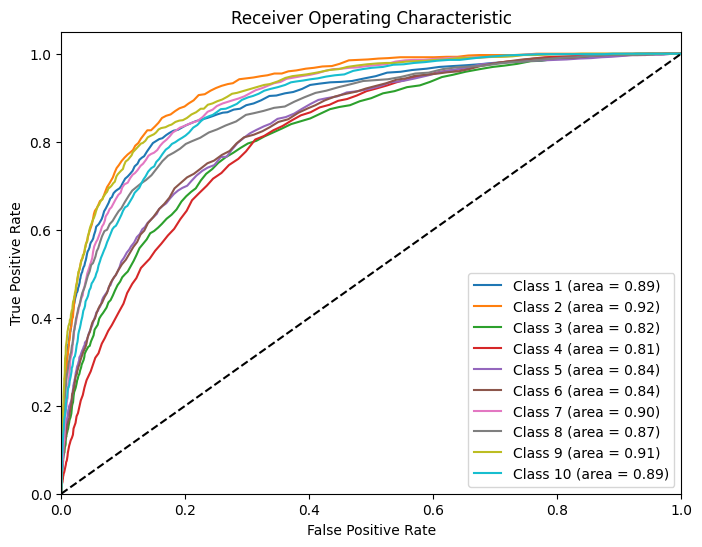

In [73]:
# 获取类别数量
n_classes = len(np.unique(y_train))
# 绘制ROC曲线
plot_roc_curve(model, X_test_pca, y_test, n_classes)

In [62]:
'''Resnet'''

'Resnet'

In [74]:
import os
import torch
import torchvision
from torch import nn
from d2l import torch as d2l
import collections
import shutil
import math
import pandas as pd

data_dir = 'C:/Users/ClairDeLune/Desktop/机器学习大作业/datasets'

#读取CSV文件中的标签，返回一个字典，该字典将文件名中不带扩展名的部分映射到其标签。
#读取训练数据标签、拆分验证集并整理训练集
def read_csv_labels(fname):
    with open(fname, 'r') as f:
        lines = f.readlines()[1:]
    tokens = [l.rstrip().split(',') for l in lines]
    return dict(((name, label) for name, label in tokens))

labels = read_csv_labels(os.path.join(data_dir, 'labels/trainLabels.csv'))
testlabels = read_csv_labels(os.path.join(data_dir, 'labels/testLabels.csv'))
print("# 测试样本 :", len(testlabels))
print("#类别 :", len(set(testlabels.values())))


# 测试样本 : 10000
#类别 : 10


In [75]:
#重写dataset

In [76]:
#@save
def copyfile(filename, target_dir):
    """将文件复制到目标目录"""
    os.makedirs(target_dir, exist_ok=True)
    shutil.copy(filename, target_dir)

#@save
def reorg_train_valid(data_dir, labels, train=True):
    """重写数据集"""
    if train:
        for train_file in os.listdir(os.path.join(data_dir, 'train_cifar10')):
            label = labels[train_file.split('.')[0]]
            fname = os.path.join(data_dir, 'train_cifar10', train_file)
            copyfile(fname, os.path.join(data_dir, 'train',
                                        'train_cifar10', label))
    else:
        for test_file in os.listdir(os.path.join(data_dir, 'test_cifar10')):
            label = labels[test_file.split('.')[0]]
            fname = os.path.join(data_dir, 'teset_cifar10', train_file)
            copyfile(fname, os.path.join(data_dir, 'test',
                                        'test_cifar10', label))

In [60]:
#@save
def reorg_test(data_dir):
    """在预测期间整理测试集，以方便读取"""
    for test_file in os.listdir(os.path.join(data_dir, 'test_cifar10')):
        copyfile(os.path.join(data_dir, 'test_cifar10', test_file),
                 os.path.join(data_dir, 'train_valid_test', 'test_cifar10',
                              'unknown'))

In [61]:
def reorg_cifar10_data(data_dir, valid_ratio):
    labels = read_csv_labels(os.path.join(data_dir, 'labels/trainLabels.csv'))
    testlabels = read_csv_labels(os.path.join(data_dir, 'labels/testLabels.csv'))
    reorg_train_valid(data_dir, labels, valid_ratio)
    reorg_test(data_dir)

In [ ]:
reorg_cifar10_data(data_dir,True)
reorg_cifar10_data(data_dir,False)

In [ ]:
transform_train = torchvision.transforms.Compose([
    # 在高度和宽度上将图像放大到40像素的正方形
    torchvision.transforms.Resize(40),
    # 随机裁剪出一个高度和宽度均为40像素的正方形图像，
    # 生成一个面积为原始图像面积0.64～1倍的小正方形，
    # 然后将其缩放为高度和宽度均为32像素的正方形
    torchvision.transforms.RandomResizedCrop(32, scale=(0.64, 1.0),
                                                   ratio=(1.0, 1.0)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    # 标准化图像的每个通道
    torchvision.transforms.Normalize([0.4914, 0.4822, 0.4465],
                                     [0.2023, 0.1994, 0.2010])])

In [ ]:
transform_test = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.4914, 0.4822, 0.4465],
                                     [0.2023, 0.1994, 0.2010])])

In [ ]:
train_ds, train_valid_ds = [torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'train_valid_test', folder),
    transform=transform_train) for folder in ['train_cifar10', 'train_valid']]

valid_ds, test_ds = [torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'train_valid_test', folder),
    transform=transform_test) for folder in ['valid', 'test_cifar10']]

In [46]:
batch_size = 256
train_iter, train_valid_iter = [torch.utils.data.DataLoader(
                                dataset, batch_size, shuffle=True, drop_last=True)
                                for dataset in (train_ds, train_valid_ds)]
valid_iter = torch.utils.data.DataLoader(valid_ds, batch_size, shuffle=False,
                                        drop_last=True)
test_iter = torch.utils.data.DataLoader(test_ds, batch_size, shuffle=False,
                                        drop_last=False)

In [47]:
from torch.nn import functional as F
class Residual(nn.Module):
    """两种残差块，一种输入输出大小相同，一种使用1*1卷积改变输出大小"""
    def __init__(self, input_channels, num_channels,
                 use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels,
                               kernel_size=3, padding=1, stride=strides)
        self.conv2 = nn.Conv2d(num_channels, num_channels,
                               kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(input_channels, num_channels,
                                   kernel_size=1, stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [48]:
def resnet_block(in_channels, out_channels, num_residuals,
                 first_block=False):
    """残差块的再一次封装，resnet模型结构是两个残差块为一组，第一组不改变输出大小"""
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(in_channels, out_channels,
                                    use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(out_channels, out_channels))
    return nn.Sequential(*blk)

In [49]:
def resnet18(num_classes, in_channels=1):
    """resnet18 网络结构的实现"""
    net = nn.Sequential(
        nn.Conv2d(in_channels, 64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU())
    net.add_module("resnet_block1", resnet_block(64, 64, 2, first_block=True))
    net.add_module("resnet_block2", resnet_block(64, 128, 2))
    net.add_module("resnet_block3", resnet_block(128, 256, 2))
    net.add_module("resnet_block4", resnet_block(256, 512, 2))
    net.add_module("global_avg_pool", nn.AdaptiveAvgPool2d((1,1)))
    net.add_module("fc", nn.Sequential(nn.Flatten(),
                                       nn.Linear(512, num_classes)))
    return net


In [50]:
def get_net():
    num_classes = 10
    net = resnet18(num_classes, 3)
    return net

loss = nn.CrossEntropyLoss(reduction="none")

In [51]:
# 可视化
# %matplotlib inline
from matplotlib_inline import backend_inline
from matplotlib import pyplot as plt

def use_svg_display(): #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def set_figsize(figsize=(3.5, 2.5)): #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
    
from IPython import display    
class Accumulator:
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
    
    
class Animator:
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: set_axes(self.axes[
            0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)
        
import time        
class Timer: #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()
    
    def start(self):
        """启动计时器"""
        self.tik = time.time()
    
    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    
    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)
    def sum(self):
        """返回时间总和"""
        return sum(self.times)
    
    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [52]:
# 计算准确率
def accuracy(y_hat, y):
    """Compute the number of correct predictions."""
    # 如果y_hat是多维的，并且第二维大于1，使用argmax来获取预测的类别
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = torch.argmax(y_hat, dim=1)
    # 比较预测值和真实值是否相等，并计算相等的个数
    correct = (y_hat == y).sum().item()
    return correct

def evaluate_accuracy_gpu(net, data_iter, device=None):
    """Compute the accuracy for a model on a dataset using a GPU."""
    if isinstance(net, nn.Module):
        net.eval()  # Set the model to evaluation mode
        if not device:
            device = next(iter(net.parameters())).device
            
    # No. of correct predictions, no. of predictions
    metric = Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # Required for BERT Fine-tuning (to be covered later)
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]


def try_all_gpus():
    """"获取gpu信息，方便gpu加速"""
    devices = [torch.device(f'cuda:{i}')
             for i in range(torch.cuda.device_count())]
    return devices if devices else [torch.device('cpu')]

In [53]:
def train_batch(net, X, y, loss, trainer, devices):
    """ 模型训练
    数据送到gpu 设置训练模式 梯度清零 前向传播 计算损失 反向传播 参数更新 计算训练损失和准确率`"""
    if isinstance(X, list):
        # Required for BERT fine-tuning (to be covered later)
        X = [x.to(devices[0]) for x in X]
    else:
        X = X.to(devices[0])
    y = y.to(devices[0])
    net.train()
    trainer.zero_grad()
    pred = net(X)
    l = loss(pred, y)
    l.sum().backward()
    trainer.step()
    train_loss_sum = l.sum()
    train_acc_sum = accuracy(pred, y)
    return train_loss_sum, train_acc_sum

In [54]:
def train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period,
          lr_decay):
    trainer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.9,
                              weight_decay=wd)
    scheduler = torch.optim.lr_scheduler.StepLR(trainer, lr_period, lr_decay)
    num_batches, timer = len(train_iter), Timer()
    legend = ['train loss', 'train acc']
    if valid_iter is not None:
        legend.append('valid acc')
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=legend)
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])
    for epoch in range(num_epochs):
        net.train()
        metric = Accumulator(3)
        for i, (features, labels) in enumerate(train_iter):
            timer.start()
            l, acc = train_batch(net, features, labels,
                                          loss, trainer, devices)
            metric.add(l, acc, labels.shape[0])
            timer.stop()
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (metric[0] / metric[2], metric[1] / metric[2],
                              None))
        if valid_iter is not None:
            valid_acc = evaluate_accuracy_gpu(net, valid_iter)
            animator.add(epoch + 1, (None, None, valid_acc))
        scheduler.step()
    measures = (f'train loss {metric[0] / metric[2]:.3f}, '
                f'train acc {metric[1] / metric[2]:.3f}')
    if valid_iter is not None:
        measures += f', valid acc {valid_acc:.3f}'
    print(measures + f'\n{metric[2] * num_epochs / timer.sum():.1f}'
          f' examples/sec on {str(devices)}')

train loss 0.160, train acc 0.945, valid acc 0.838
1704.2 examples/sec on [device(type='cuda', index=0)]


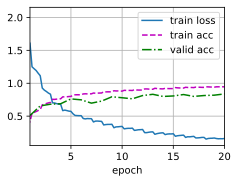

In [55]:
devices, num_epochs, lr, wd = try_all_gpus(), 20, 2e-4, 5e-4
print("train on ", devices)
lr_period, lr_decay, net = 4, 0.9, get_net()
print(net)
train(net, train_iter, valid_iter, num_epochs, lr, wd, devices, lr_period,
      lr_decay)
# 保存模型
# torch.save(net.state_dict(), '/kaggle/working/resnet18_cifar10.pth')
preds = []
for X, _ in test_iter:
    y_hat = net(X.to(devices[0]))
    preds.extend(y_hat.argmax(dim=1).type(torch.int32).cpu().numpy())
sorted_ids = list(range(1, len(test_ds) + 1))
sorted_ids.sort(key=lambda x: str(x))
df = pd.DataFrame({'id': sorted_ids, 'label': preds})
